Christian Basso, Konrad Rozpadek, Kyle Robinson

Program 2: Benchmarking Insertion and Selection Sorts

CSC3310 - 001

Febuary 16, 2024

# Program 2: Benchmarking Insertion and Selection Sorts

This program impliments and benchmarks insertion and selection sorts. First, an implimentation of each algorithm is programmed, then tested with various array sizes and stuctures. Each algorithim is then benchmarked using a custom benchmark function. Each algorithim is benchmarked using 5 array sizes with each having three stucture variations (best, worst, and average case). A linear regression model is then made by taking the log of the run time and list size to determine the time complexity of each algorithim in relation to each other. These models are then plotted by algorithm and by array case.

## Implimentations

### Selection Sort

In [27]:
def selection(a):
    for j in range(0, len(a) - 1):
        smallest = j
        for i in range(j + 1, len(a)):
            if a[i] < a[smallest]:
                smallest = i

        temp = a[j]
        a[j] = a[smallest]
        a[smallest] = temp
    return a

### Insertion Sort

In [28]:
def insertion(a):
    for j in range(len(a)):
        key = a[j]
        i = j - 1
        while i >= 0 and a[i] > key:
            a[i + 1] = a[i]
            i = i - 1
        a[i + 1] = key
    return a


## Test Cases

#### Test Case Generation

In [29]:
empty_test = ([],[])
keep_sorted_test = (list(range(100)), list(range(100)))
inverse_test = (list(range(100, 0, -1)), sorted(list(range(100, 0, -1))))
single_element_test = [[3], [3]]
def create_random_array(num):
    import random
    a = []
    for i in range(num):
        a.append(random.randint(-1e9, 1e9))
    return a
rand_10 = create_random_array(10)
rand_100 = create_random_array(100)
rand_1000 = create_random_array(1000)
random_10_test = (rand_10, sorted(rand_10))
random_100_test = (rand_100, sorted(rand_100))
random_1000_test = (rand_1000, sorted(rand_1000))
tests = [empty_test, keep_sorted_test, inverse_test, 
         single_element_test, random_10_test, random_100_test, random_1000_test]

In [30]:
for test in tests:
    before_sort = test[0]
    expected = test[1]
    selection_results = selection(before_sort)
    insertion_results = insertion(before_sort)
    assert expected == selection_results
    assert expected == insertion_results
print("All tests passed")

All tests passed


## Benchmarking

### Functions to Create Benchmarking Inputs

#### Forwards Sorted (Best Case)

In [31]:
def create_forwards_array(num):
    a = []
    for i in range(0, num):
        a.append(i)
    return a

#### Backwards Sorted (Worst Case)

In [32]:
def create_backwards_array(num):
    a = []
    for i in range(num, 0, -1):
        a.append(i)
    return a

#### Randomly Sorted (Average Case)

In [33]:
def create_random_array(num):
    import random
    a = []
    for i in range(num):
        a.append(random.randint(0, num))
    return a

### Creating Benchmarking Inputs

In [34]:
forwards_20 = create_forwards_array(20)
forwards_200 = create_forwards_array(200)
forwards_1000 = create_forwards_array(1000)
forwards_5000 = create_forwards_array(5000)
forwards_10000 = create_forwards_array(10000)

backwards_20 = create_backwards_array(20)
backwards_200 = create_backwards_array(200)
backwards_1000 = create_backwards_array(1000)
backwards_5000 = create_backwards_array(5000)
backwards_10000 = create_backwards_array(10000)

average_20 = create_random_array(20)
average_200 = create_random_array(200)
average_1000 = create_random_array(1000)
average_5000 = create_random_array(5000)
average_10000 = create_random_array(10000)
list_sizes = [20,200,1000,5000,10000]
fowards = [forwards_20,forwards_200,forwards_1000,forwards_5000,forwards_10000]
backwards = [backwards_20,backwards_200,backwards_1000,backwards_5000,backwards_10000]
average = [average_20,average_200,average_1000,average_5000,average_10000]

### Benchmarking Function
As input, the function takes both a sorting function and the list to sort. It returns the elapsed time in seconds.

This function creates a copy of the input to ensure that the original list is not modified.


In [35]:
import copy
import time
def benchmark(algorithm, arr):
    copy_arr = copy.copy(arr)
    start_time = time.perf_counter()
    algorithm(copy_arr)
    end_time = time.perf_counter()
    return end_time - start_time


### Performing Benchmarking

In [36]:
time_fowards_selection = []
time_backwards_selection = []
time_average_selection = []
time_fowards_insertion = []
time_backwards_insertion = []
time_average_insertion = []
for arr in fowards:
    time_fowards_selection.append(benchmark(selection, arr))
    time_fowards_insertion.append(benchmark(insertion, arr))
for arr in backwards:
    time_backwards_selection.append(benchmark(selection, arr))
    time_backwards_insertion.append(benchmark(insertion, arr))
for arr in average:
    time_average_selection.append(benchmark(selection, arr))
    time_average_insertion.append(benchmark(insertion, arr))


### Linear Regression Modeling

In [37]:
import numpy as np
from scipy.stats import linregress

In [38]:
m_selection_best = linregress (np.log(list_sizes) , np.log(time_fowards_selection) )
m_insertion_best = linregress (np.log(list_sizes) , np.log(time_fowards_insertion) )
m_selection_worst = linregress (np.log(list_sizes) , np.log(time_backwards_selection) )
m_insertion_worst = linregress (np.log(list_sizes) , np.log(time_backwards_insertion) )
m_selection_avg = linregress (np.log(list_sizes) , np.log(time_average_selection) )
m_insertion_avg = linregress (np.log(list_sizes) , np.log(time_average_insertion) )
print("Selection Best Case Model Slope: ", m_selection_best[0])
print("Insertion Best Case Model Slope: ", m_insertion_best[0])
print("Selection Worst Case Model Slope: ", m_selection_worst[0])
print("Insertion Worst Case Model Slope: ", m_insertion_worst[0])
print("Selection Average Case Model Slope: ", m_selection_avg[0])
print("Insertion Average Case Model Slope: ", m_insertion_avg[0])

Selection Best Case Model Slope:  1.9085052885020042
Insertion Best Case Model Slope:  0.9145881631167282
Selection Worst Case Model Slope:  1.8933438690742719
Insertion Worst Case Model Slope:  1.9686563797273136
Selection Average Case Model Slope:  1.8551366525378215
Insertion Average Case Model Slope:  1.9887422202275549


## Graphing

In [39]:
import matplotlib.pyplot as plt

### Algorithm Performance

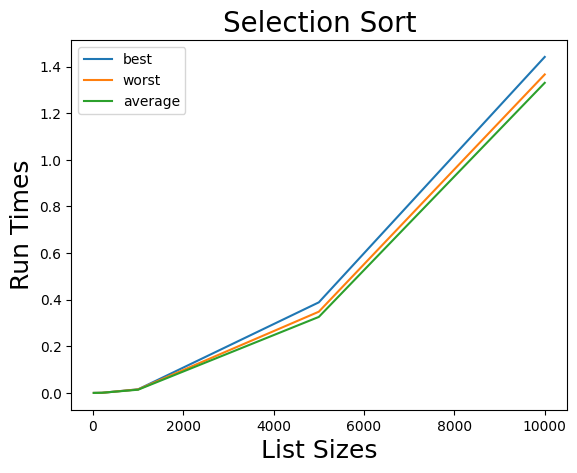

In [40]:
plt.plot(list_sizes, time_fowards_selection, label="best")    
plt.plot(list_sizes, time_backwards_selection, label="worst")    
plt.plot(list_sizes, time_average_selection, label="average")    
plt.xlabel("List Sizes", fontsize=18)
plt.ylabel("Run Times", fontsize=18)
plt.title("Selection Sort", fontsize=20)
plt.legend()

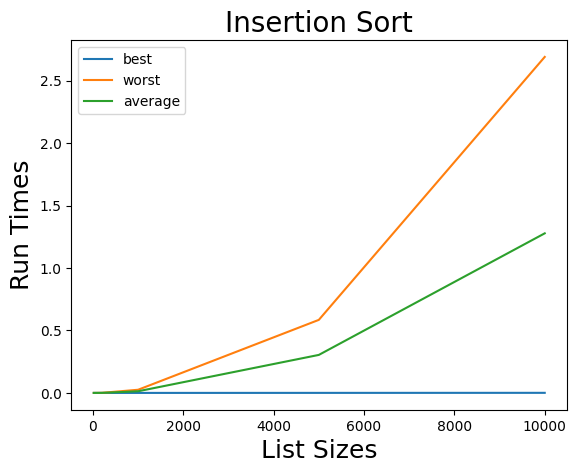

In [41]:
plt.plot(list_sizes, time_fowards_insertion, label="best")    
plt.plot(list_sizes, time_backwards_insertion, label="worst")    
plt.plot(list_sizes, time_average_insertion, label="average")    
plt.xlabel("List Sizes", fontsize=18)
plt.ylabel("Run Times", fontsize=18)
plt.title("Insertion Sort", fontsize=20)
plt.legend()

### Case Comparison

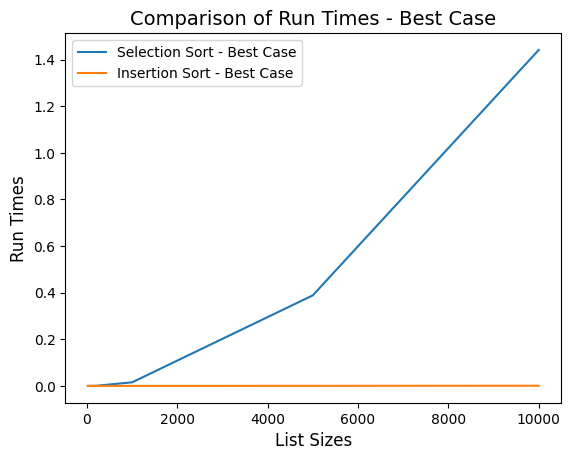

In [42]:
# Plotting best case
plt.plot(list_sizes, time_fowards_selection, label="Selection Sort - Best Case")
plt.plot(list_sizes, time_fowards_insertion, label="Insertion Sort - Best Case")
plt.xlabel("List Sizes", fontsize=12)
plt.ylabel("Run Times", fontsize=12)
plt.title("Comparison of Run Times - Best Case", fontsize=14)
plt.legend()
plt.show()



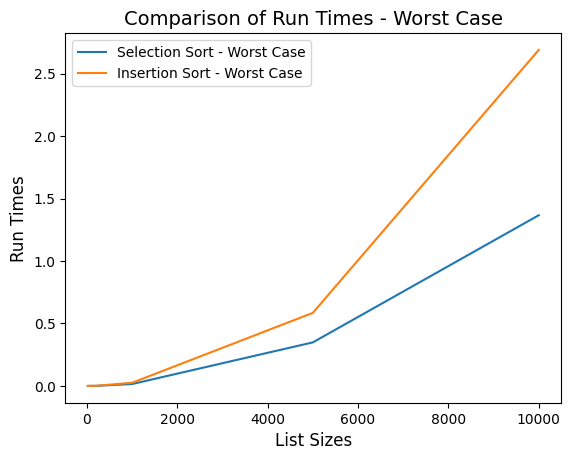

In [43]:
# Plotting worst case
plt.plot(list_sizes, time_backwards_selection, label="Selection Sort - Worst Case")
plt.plot(list_sizes, time_backwards_insertion, label="Insertion Sort - Worst Case")
plt.xlabel("List Sizes", fontsize=12)
plt.ylabel("Run Times", fontsize=12)
plt.title("Comparison of Run Times - Worst Case", fontsize=14)
plt.legend()
plt.show()

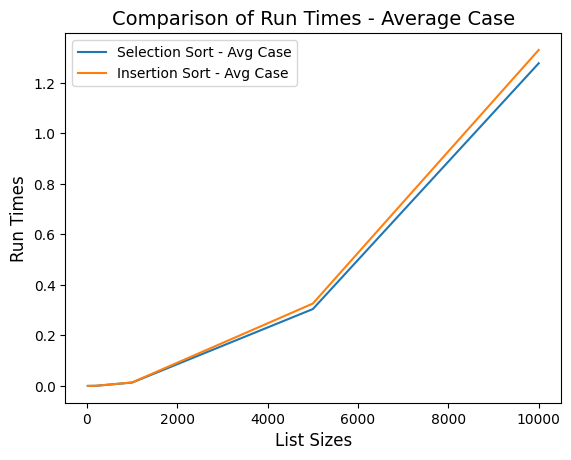

In [44]:
# Plotting average case
plt.plot(list_sizes, time_average_insertion, label="Selection Sort - Avg Case")
plt.plot(list_sizes, time_average_selection, label="Insertion Sort - Avg Case")
plt.xlabel("List Sizes", fontsize=12)
plt.ylabel("Run Times", fontsize=12)
plt.title("Comparison of Run Times - Average Case", fontsize=14)
plt.legend()
plt.show()

## Reflection Questions

- Based on your results, which of the two sorting algorithms would you use in practice? Why?

In practice, both algorithms would be considered based on the known structure of the input. If the input is known to be mostly sorted, insertion sort would be the best choice. If the input is known to be mostly unsorted, selection sort would be the best choice. However, if the input is unknown, either algorithm would be a valid choice since they had nearly identical average case runtimes according to our results.

